### Two-body problem 

Let's suppose a system made up by two particles of masses $m_1$ and $m_2$. We wil not consider external forces, only **gravity**. We would like to know the position of each particle at any time. So, let's derive the equations of motion of this system. 

We suppose $\vec{r}_1 = x_1\hat{i} + y_1 \hat{j} + z_1\hat{k} $ and $\vec{r}_2 = x_2\hat{i} + y_2 \hat{j} + z_2\hat{k}$ the positions of both particles from the origin. We take $\vec{R} = \vec{r}_2 - \vec{r}_1 $  as the position vector from the particle 1 to particle 2. 

To get the equations of motions we use the Newton's second law, that is, $\sum \vec{F} = m\vec{a}$. As we said earlier, the only force acting on this system is gravity. Hence, the equations of motion are

$$m_1\ddot{\vec{r}}_{1}=G m_1 m_{2} \frac{\vec{R}}{R^{3}} \rightarrow \ddot{\vec{r}}_{1}=G m_{2} \frac{\vec{R}}{R^{3}}
\\ m_2\ddot{\vec{r}}_{2}=-G m_1 m_{2} \frac{\vec{R}}{R^{3}} \rightarrow \ddot{\vec{r}}_{2}= -G m_{1} \frac{\vec{R}}{R^{3}} \tag{1}$$

where **G** = $ 6.674×10^{-11} m^{3}⋅kg^{-1}⋅s^{2} $ is the **gravitational constant**. The minus sign in the second equation comes from the fact that the force from particle 1 to particle 2 is the opposite of the force from particle 2 to particle 1.

Equation(s) [1] is a vector equation. In order to solve it numerically it's convenient to rewrite it in it's different components. 

$$\begin{array}{rlr}\ddot{x}_{1}=G m_{2} \frac{x_{2}-x_{1}}{R^{3}} & \ddot{y}_{1}=G m_{2} \frac{y_{2}-y_{1}}{R^{3}} & \ddot{z}_{1}=G m_{2} \frac{z_{2}-z_{1}}{R^{3}} 
\\ \ddot{x}_{2}=G m_{1} \frac{x_{1}-x_{2}}{R^{3}} & \ddot{y}_{2}=G m_{1} \frac{y_{1}-y_{2}}{R^{3}} & \ddot{z}_{2}=G m_{1} \frac{z_{1}-z_{2}}{r^{3}}\end{array} \tag{2}$$

If we want to solve these equations with a numerical method, say Runge-Kutta 4, we need first-order differential equations. So, we need to transform this set of second order differential equations into first-order. This can be done by defining $v_i = \frac{d r_i}{dt}$ (velocity) and rewriting equations [2] in terms of this new variable, ending up with a set of 12 first order differential equations. 

Let's solve it numerically!

In [111]:
import numpy as np

In [112]:
#Masses m1 and m2
m1 = float(1e26)
m2 =  float(1e26)

#Steps and time-step
steps = 2000
h = 0.2
t = np.zeros(steps+1)

#Initial conditions r1 = (x1, y1, z1), r2 = (x2, y2, z2),  v1 = (vx1, vy1, vz1), v2 = (vx2, vy2, vz2)

r1, r2, v1, v2 = np.zeros((steps+1, 3)), np.zeros((steps+1, 3)), np.zeros((steps+1, 3)), np.zeros((steps+1, 3))


r1[0] = np.array([0,0,0])
r2[0] = np.array([3000, 0, 0])  #In km

v1[0] = np.array([10, 20, 30])
v2[0] = np.array([0, 40, 0])

In [113]:
#Equations of motion

def dydt(t, r1, r2, v1, v2, i, m1, m2):
    
    #Gravitational constant
    G = G = float(6.674e-20)  #km**3/kg/s**2
    
    y = np.concatenate((r1, r2, v1, v2))

    r = r2 - r1
    R = np.linalg.norm(r)  #Norm of the vector
    
    if i in range(0, 6):
        
        return y[i+6]
    
    elif i == 6:
        
        return G*m2*r[0]/R**3
    
    elif i == 7:
        
        return G*m2*r[1]/R**3
    
    elif i ==8:
        
        return G*m2*r[2]/R**3
    
    elif i == 9:
        
        return -G*m1*r[0]/R**3
    
    elif i == 10:
        
        return -G*m1*r[1]/R**3
    
    elif i == 11:
        
        return -G*m1*r[2]/R**3

In [114]:
def rungeKutta(t, r1, r2, v1, v2, h, steps, m1, m2):
    
    for j in range(steps):
        
        k1, k2, k3, k4 = np.zeros(12), np.zeros(12), np.zeros(12), np.zeros(12)
        size = len(k1)
        
        for i in range(size):
            
            k1[i] = h*dydt(t[j], r1[j] , r2[j], v1[j], v2[j], i, m1, m2)
            
        for i in range(size):
                      
            k2[i] = h*dydt(t[j] + 0.5*h, r1[j] + 0.5*k1[0:3], r2[j] + 0.5*k1[3:6], v1[j] + 0.5*k1[6:9], v2[j] + 0.5*k1[9:12], i, m1, m2)
        
        for i in range(size):
            
            k3[i] = h*dydt(t[j] + 0.5*h, r1[j] + 0.5*k2[0:3], r2[j] + 0.5*k2[3:6], v1[j] + 0.5*k2[6:9], v2[j] + 0.5*k2[9:12], i, m1, m2)
        
        for i in range(size):
            
            k4[i] = h*dydt(t[j] + h, r1[j] + k2[0:3], r2[j] + k2[3:6], v1[j] + k2[6:9], v2[j] + k2[9:12], i, m1, m2)
            

        # Update next value of y and t
        r1[j+1] = r1[j] + (k1[0:3] + 2*k2[0:3] + 2*k3[0:3] + k4[0:3])/6
        r2[j+1] = r2[j] + (k1[3:6] + 2*k2[3:6] + 2*k3[3:6] + k4[3:6])/6
        v1[j+1] = v1[j] + (k1[6:9] + 2*k2[6:9] + 2*k3[6:9] + k4[6:9])/6
        v2[j+1] = v2[j] + (k1[9:12] + 2*k2[9:12] + 2*k3[9:12] + k4[9:12])/6

        t[j+1] = t[j] + h
        
    return t, r1, r2, v1, v2

In [115]:
#Solving the equations

t, r1, r2, v1, v2 = rungeKutta(t, r1, r2, v1, v2, h, steps, m1, m2)

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

MovieWriter ffmpeg unavailable; using Pillow instead.


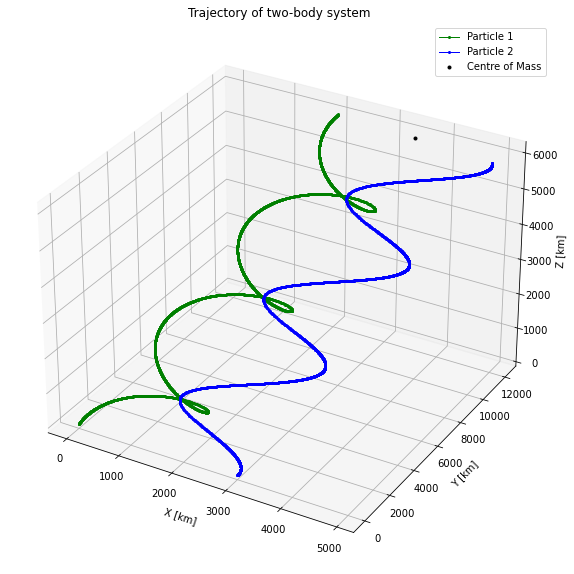

In [117]:
#ANIMATION

#Position of the centre of mass
r_cm = (r1*m1 + r2*m2) / (m2 + m2)

#Transpose
r1, r2, r_cm = r1.T, r2.T, r_cm.T

fig = plt.figure(figsize =(10,10))
ax = fig.add_subplot(projection='3d')

def func(frame, r1, r2, r_cm, line1, line2, line3, factor):
    
    #First particle
    line1.set_data(r1[0:2, :frame*factor])    
    line1.set_3d_properties(r1[2, :frame*factor])
    line1.set_label('Particle 1')

    
    #Second particle
    line2.set_data(r2[0:2, :frame*factor])    
    line2.set_3d_properties(r2[2, :frame*factor])
    line2.set_label('Particle 2')
    
    #Centre of mass
    line3.set_data(r_cm[0:2,frame*factor])    
    line3.set_3d_properties(r_cm[2, frame*factor])
    line3.set_label('Centre of Mass')
    
    
    ax.legend()
    
    
    return line1, line2, line3
 
line1 = plt.plot(r1[0], r1[1], r1[2], 'go-', lw = 1, markersize = 2)[0] 
line2 = plt.plot(r2[0], r2[1], r2[2], 'bo-', lw = 1, markersize = 2)[0]
line3 = plt.plot(r_cm[0], r_cm[1], r_cm[2], 'ko', markersize = 3)[0]
 
# AXES PROPERTIES
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')
ax.set_title('Trajectory of two-body system')
 
# Creating the Animation object
factor = 3   #To accelerate the animation
frames = int(steps/factor)
line_ani = animation.FuncAnimation(fig, func, frames=frames, fargs=(r1, r2, r_cm,line1, line2, line3, factor), interval=1, blit=False)
line_ani.save(r'2body_problem.gif')